## What is the most optimal skill to learn for Data Analysts?

#### Methodology
* Group skills to determine median salary and likelihood of being in posting
* Visualize median salary vs percent skill demand
* Determine if certain technologies are more prevalent

In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

my_dataset = load_dataset('lukebarousse/data_jobs')
df = my_dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\Andrzej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == "United States")].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

In [6]:
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

In [7]:
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand
 

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


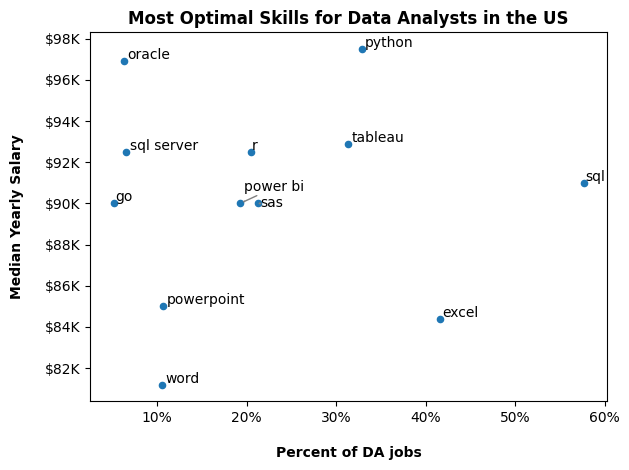

In [8]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Dostosowanie tekstów, aby unikać nakładania się
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Ustawienie etykiet osi z pogrubieniem i oddaleniem
plt.xlabel('Percent of DA jobs', fontweight='bold', labelpad=15)
plt.ylabel('Median Yearly Salary', fontweight='bold', labelpad=15)
plt.title(f'Most Optimal Skills for Data Analysts in the US', fontweight='bold')

# Formatowanie osi
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Dostosowanie wyglądu wykresu
plt.tight_layout()
plt.show()


In [9]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['microstrategy',
  'powerpoint',
  'power bi',
  'outlook',
  'visio',
  'word',
  'splunk',
  'dax',
  'looker',
  'ssis',
  'nuix',
  'spss',
  'sap',
  'ssrs',
  'excel',
  'ms access',
  'esquisse',
  'alteryx',
  'sharepoint',
  'powerbi',
  'datarobot',
  'msaccess',
  'sheets',
  'spreadsheet',
  'tableau',
  'cognos',
  'qlik',
  'sas'],
 'programming': ['c',
  'java',
  'dart',
  'apl',
  'css',
  'fortran',
  'groovy',
  'clojure',
  'lua',
  'mongo',
  'kotlin',
  'no-sql',
  'matlab',
  'sass',
  'shell',
  'javascript',
  'julia',
  'haskell',
  'visualbasic',
  'objective-c',
  'nosql',
  'perl',
  'crystal',
  'assembly',
  'f#',
  'c#',
  'swift',
  'go',
  'typescript',
  'visual basic',
  'php',
  'solidity',
  'mongodb',
  't-sql',
  'ruby',
  'vb.net',
  'golang',
  'scala',
  'c++',
  'r',
  'python',
  'sas',
  'ocaml',
  'html',
  'erlang',
  'pascal',
  'bash',
  'elixir',
  'lisp',
  'cobol',
  'vba',
  'powershell',
  'rust',
  'delphi',
  '

In [10]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['techology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,techology,skills
0,analyst_tools,microstrategy
0,analyst_tools,powerpoint
0,analyst_tools,power bi
0,analyst_tools,outlook
0,analyst_tools,visio
...,...,...
9,sync,rocketchat
9,sync,symphony
9,sync,unify
9,sync,microsoft teams


In [11]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

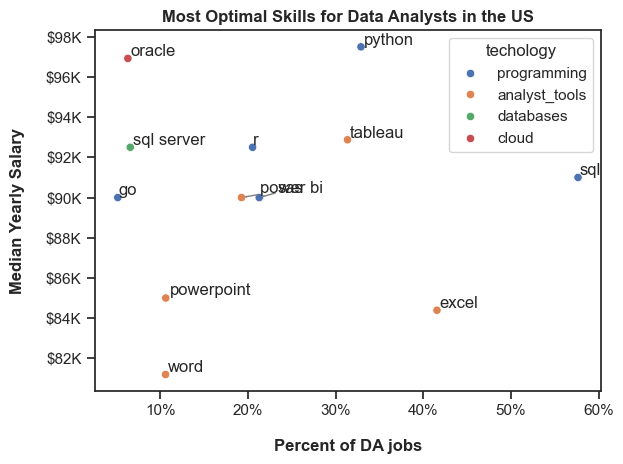

In [20]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='techology'
)

sns.set_theme(style='ticks')
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Dostosowanie tekstów, aby unikać nakładania się
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Ustawienie etykiet osi z pogrubieniem i oddaleniem
plt.xlabel('Percent of DA jobs', fontweight='bold', labelpad=15)
plt.ylabel('Median Yearly Salary', fontweight='bold', labelpad=15)
plt.title(f'Most Optimal Skills for Data Analysts in the US', fontweight='bold')


ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.tight_layout()
plt.show()